# Лабораторная №6

##  Вариант №15

In [1]:
import numpy as np
from numpy.linalg import inv, det
import matplotlib.pyplot as plt
import pandas as pd
from copy import copy
%matplotlib inline 

## Аналитический метод

In [2]:
def solve_analytically(matrix_c):
    u = np.ones(matrix_c.shape[0])
    v = 1/(u.dot(inv(matrix_c)).dot(u))
    x_star = u.dot(inv(matrix_c))*v
    y_star = inv(matrix_c).dot(u)*v
    
    return {
        'x_strategies' : x_star,
        'y_strategies' : y_star,
        'v' : v
    }

## Метод Брауна-Робинсон

In [3]:
# выбор стратегий игроков
def brown_robinson_step(a_strats_count, b_strats_count, matrix_c):
    a_gains = matrix_c.dot(b_strats_count)
    b_gains = a_strats_count.dot(matrix_c)
    
    indexes = np.linspace(0, matrix_c.shape[0] - 1, matrix_c.shape[0], dtype=int)
    
    a_max_ids = indexes[np.isin(a_gains, np.max(a_gains))]
    b_min_ids = indexes[np.isin(b_gains, np.min(b_gains))]
    
    return np.random.choice(a_max_ids, 1)[0], np.random.choice(b_min_ids, 1)[0]

def solve_brown_robinson(matrix_c, requred_epsilon=0, max_steps=100000):
    a_strats_count = np.zeros(matrix_c.shape[0])
    b_strats_count = np.zeros(matrix_c.shape[1])
    
    epsilon_history = []
    epsilon = 0
    
    i = 0
    j = 0
    k = 0
    # Задание числа, заведомо большего чем требуемая погрешность
    epsilon = 9999999
    
    v_overline_min_k = 9999999
    v_underline_max_k = 0
    
    table = pd.DataFrame(columns=['A', 'B', 'Выбор А', 'Выбор B', 'v_overline', 'v_underline', 'epsilon'])
    
    while k < max_steps and epsilon > requred_epsilon:
        a_strats_count[i] += 1
        b_strats_count[j] += 1
        k += 1
        
        i, j = brown_robinson_step(a_strats_count, b_strats_count, matrix_c)
        
        v_overline = np.max(matrix_c.dot(b_strats_count))
        v_underline = np.min(a_strats_count.dot(matrix_c))
        
        v_overline_min_k = min(v_overline/k, v_overline_min_k)
        v_underline_max_k = max(v_underline/k, v_underline_max_k)
        
        epsilon = v_overline_min_k - v_underline_max_k
        epsilon_history.append(epsilon)
        
        table.loc[k] = [i + 1, j + 1, copy(matrix_c.dot(b_strats_count)), copy(a_strats_count.dot(matrix_c)), round(v_overline / k, 2), round(v_underline / k, 2), round(epsilon, 2)]
        
    return {
        'epsilon' : round(epsilon, 2),
        'history' : epsilon_history,
        'x_strategies' : np.round(a_strats_count / k, 2),
        'y_strategies' : np.round(b_strats_count / k, 2),
        'v_overline' : round(v_overline_min_k, 2),
        'v_underline' : round(v_underline_max_k, 2),
        'v' : round((v_overline_min_k + v_underline_max_k) / 2, 2),
        'iterations' : k,
        'table' : table,
    }

## Решение

### Матрица по варианту

In [4]:
C = np.array([[18, 13, 15],
              [ 0, 13, 16],
              [ 1, 17, 9]])
print(C)

[[18 13 15]
 [ 0 13 16]
 [ 1 17  9]]


In [5]:
result_br = solve_brown_robinson(C, requred_epsilon=0.1)
result_an = solve_analytically(C)

Iterations: 67
epsilon: 0.1
(v_overline, v_underline): 13.9 13.8
v_br:         13.85
analytical v: 13.81592039800995
analytical x_strategies: [0.75621891 0.039801   0.2039801 ] ; sum: 1.0
analytical y_strategies: [0.0199005  0.62189055 0.35820896] ; sum: 1.0
BR x_strategies:         [0.72 0.   0.28] ; sum: 1.0
BR y_strategies:         [0.1  0.72 0.18] ; sum: 1.0


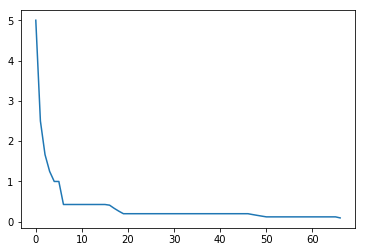

In [6]:
print('Iterations:', result_br['iterations'])
plt.plot(result_br['history'])
print('epsilon:', result_br['epsilon'])
print('(v_overline, v_underline):', result_br['v_overline'], result_br['v_underline'])
print('v_br:        ', result_br['v'])
print('analytical v:', result_an['v'])
print('analytical x_strategies:', result_an['x_strategies'], '; sum:', np.sum(result_an['x_strategies']))
print('analytical y_strategies:', result_an['y_strategies'], '; sum:', np.sum(result_an['y_strategies']))

print('BR x_strategies:        ', result_br['x_strategies'], '; sum:', np.sum(result_br['x_strategies']))
print('BR y_strategies:        ', result_br['y_strategies'], '; sum:', np.sum(result_br['y_strategies']))
# print('delta x_strategies:', np.round(np.abs(result_an['x_strategies'] - result_br['x_strategies']), 2))
# print('delta y_strategies:', np.round(np.abs(result_an['y_strategies'] - result_br['y_strategies']), 2))

In [7]:
result_br['table']

,A,B,Выбор А,Выбор B,v_overline,v_underline,epsilon
1,1,2,"[18.0, 0.0, 1.0]","[18.0, 13.0, 15.0]",18.00,13.00,5.00
2,1,2,"[31.0, 13.0, 18.0]","[36.0, 26.0, 30.0]",15.50,13.00,2.50
3,1,2,"[44.0, 26.0, 35.0]","[54.0, 39.0, 45.0]",14.67,13.00,1.67
4,1,2,"[57.0, 39.0, 52.0]","[72.0, 52.0, 60.0]",14.25,13.00,1.25
5,1,2,"[70.0, 52.0, 69.0]","[90.0, 65.0, 75.0]",14.00,13.00,1.00
6,3,2,"[83.0, 65.0, 86.0]","[108.0, 78.0, 90.0]",14.33,13.00,1.00
7,3,2,"[96.0, 78.0, 103.0]","[109.0, 95.0, 99.0]",14.71,13.57,0.43
8,3,3,"[109.0, 91.0, 120.0]","[110.0, 112.0, 108.0]",15.00,13.50,0.43
9,3,1,"[124.0, 107.0, 129.0]","[111.0, 129.0, 117.0]",14.33,12.33,0.43
10,1,1,"[142.0, 107.0, 130.0]","[112.0, 146.0, 126.0]",14.20,11.20,0.43
